<div class="alert alert-info">
    <h1>Global Fire Power Analysis</h1>
    <div>
        <ul>
            <li>Identifica la distribución de cada de las variables</li>
            <li>Que pasa si hago un k-means sin escalar los datos?</li>
            <li>Como se ven los datos escalados?</li>
            <li>Como se ve un K-means con los datos escalados?</li>
            <li>Que pasa si aplicamos un PCA</li>
            <li>Como se ve un K-means con PCA?</li>
            <li>Como se ven los paises en 2-D con un PCA?</li>
            <li>Como se ve un mapa global con los clusters?</li>
        </ul>
    </div>
</div>

In [1]:
%%html
<style>

    .indicators {
        display: flex;
        padding: 5%;
    }
    
    .row-of-indicators {
        display: flex;
        align-items: center;
        justify-content: center;
        left-padding: auto;
        height: auto;
        /* border: 1px solid white; debugging */
    }

    .indicator-el {
        width: 25%;
        height: 100%;
        padding: 1vh;
        /* border: 1px solid blue; debugging */
    }

    .indicator-el img {
        width: 50vh;
        height: 25vh;
    }

    .indicator-el p {
        text-align: center;
        height: 20%;
    }
</style>

In [34]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [3]:
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False

## Importa/limpia la data

Importa los indicadores

In [4]:
data = pd.read_csv('gfp_countries_indicators.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 28 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   country_longName                           145 non-null    object
 1   country_shortName                          145 non-null    object
 2   Total population                           145 non-null    int64 
 3   Reaching Military Age                      145 non-null    int64 
 4   Active Service                             145 non-null    int64 
 5   Active Reserves                            145 non-null    int64 
 6   Paramilitary                               145 non-null    int64 
 7   Fighters/Interceptors                      145 non-null    int64 
 8   Attack/Strike                              145 non-null    int64 
 9   Helicopter Fleets                          145 non-null    int64 
 10  Armored Fighting Vehicles             

Vamos a quedarnos con las variables que esten directamente más relacionado con lo militar (activos)

In [5]:
# Define una lista con los activos militares
mil_vars = ['Active Service', 'Active Reserves', 'Paramilitary', 'Fighters/Interceptors', 
            'Attack/Strike', 'Helicopter Fleets', 'Armored Fighting Vehicles', 'Towed Artillery',
           'Submarines', 'Frigates', 'Corvettes']

data = data.set_index(['country_longName', 'country_shortName'])[mil_vars]
display(data.head(5), data.info())

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 145 entries, ('Afghanistan', 'AFG') to ('Zimbabwe', 'ZIM')
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   Active Service             145 non-null    int64
 1   Active Reserves            145 non-null    int64
 2   Paramilitary               145 non-null    int64
 3   Fighters/Interceptors      145 non-null    int64
 4   Attack/Strike              145 non-null    int64
 5   Helicopter Fleets          145 non-null    int64
 6   Armored Fighting Vehicles  145 non-null    int64
 7   Towed Artillery            145 non-null    int64
 8   Submarines                 145 non-null    int64
 9   Frigates                   145 non-null    int64
 10  Corvettes                  145 non-null    int64
dtypes: int64(11)
memory usage: 23.6+ KB


,,Active Service,Active Reserves,Paramilitary,Fighters/Interceptors,Attack/Strike,Helicopter Fleets,Armored Fighting Vehicles,Towed Artillery,Submarines,Frigates,Corvettes
country_longName,country_shortName,,,,,,,,,,,
Afghanistan,AFG,0,0,80000,0,0,11,6555,0,0,0,0
Albania,ALB,6600,2000,500,0,0,19,976,0,0,0,0
Algeria,ALG,325000,135000,150000,102,42,298,35990,483,6,8,16
Angola,ANG,107000,0,10000,57,26,116,5500,552,0,0,0
Argentina,ARG,108000,0,20000,24,10,90,21724,172,2,0,9


None

¿Cómo se ven visualmente estas variables?

<div>
    <div class="row-of-indicators">
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/d/d1/F-106A_Chase_Dart_%28cropped%29.jpg" alt="fighters/interceptors">
            <p>Fighters/Interceptors aircraft</p>
        </div>
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/8/80/Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg/1200px-Fairchild_Republic_A-10_Thunderbolt_II_-_32156159151.jpg" alt="attack/strike">
            <p>Attack/Strike aircraft</p>
        </div>
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/4/48/Jordanian_Air_Force_UH-60_Black_Hawk_helicopter_%28cropped%29.jpg" alt="helicopter-fleets">
            <p>Helicopter Fleets</p>
        </div>
    </div>
    <div class="row-of-indicators">
        <div class="indicator-el">
            <img src="https://eco-cdn.iqpc.com/eco/images/channel_content/images/boxer.webp" alt="armored-fighting-vehicles">
            <p>Armored Fighting Vehicles</p>
        </div>
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/a/ac/M777_howitzer_rear.jpg" alt="towered-artillery">
            <p>Towed Artillery</p>
        </div>
    </div>
    <div class="row-of-indicators">
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/b/bb/US_Navy_040730-N-1234E-002_PCU_Virginia_%28SSN_774%29_returns_to_the_General_Dynamics_Electric_Boat_shipyard.jpg" alt="submarines">
            <p>Submarines</p>
        </div>
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/5a/Admiral_Gorshkov_frigate_03.jpg/640px-Admiral_Gorshkov_frigate_03.jpg" alt="frigates">
            <p>Frigates</p>
        </div>
        <div class="indicator-el">
            <img src="https://upload.wikimedia.org/wikipedia/commons/d/d2/Zarechny_%28parade%29.jpg">
            <p>Corvettes</p>
        </div>
    </div>
</div>

## Sin escalar

### Describe las variables, muestra las distribuciones e identifica posibles correlaciones

In [6]:
# Describe las variables numericas
data.describe()

,Active Service,Active Reserves,Paramilitary,Fighters/Interceptors,Attack/Strike,Helicopter Fleets,Armored Fighting Vehicles,Towed Artillery,Submarines,Frigates,Corvettes
count,1.450000e+02,1.450000e+02,1.450000e+02,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000,145.000000
mean,1.538843e+05,2.018092e+05,1.213070e+05,73.668966,27.234483,144.337931,16538.241379,407.441379,3.296552,2.820690,2.951724
std,2.968488e+05,5.759480e+05,6.096424e+05,209.141302,101.437584,506.244619,39810.587310,1014.412302,10.033364,5.507153,9.774777
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,100.000000,0.000000,0.000000,0.000000,0.000000
25%,1.840000e+04,0.000000e+00,2.000000e+03,0.000000,0.000000,13.000000,1112.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+04,2.600000e+04,1.250000e+04,11.000000,0.000000,38.000000,4522.000000,72.000000,0.000000,0.000000,0.000000
75%,1.620000e+05,1.300000e+05,5.500000e+04,53.000000,23.000000,100.000000,13710.000000,300.000000,2.000000,4.000000,2.000000
max,2.035000e+06,5.000000e+06,6.800000e+06,1854.000000,896.000000,5737.000000,360069.000000,8356.000000,65.000000,42.000000,83.000000


Notas

- Parece que muy pocos paises tienen `Submarines`, `Frigates` y `Corvettes` i.e. activos navales
- Los `Active Service`, `Active Reserves` y `Paralimitary` estan en millones de personas
- Los `Armored Fighting Vehicles` parece ser uno de los indicadores con mayores valores (miles) en comparación con otros equipos como barcos.

Genera las distribuciones de las variables

Text(0.5, 1.05, 'Distribución de las variables')

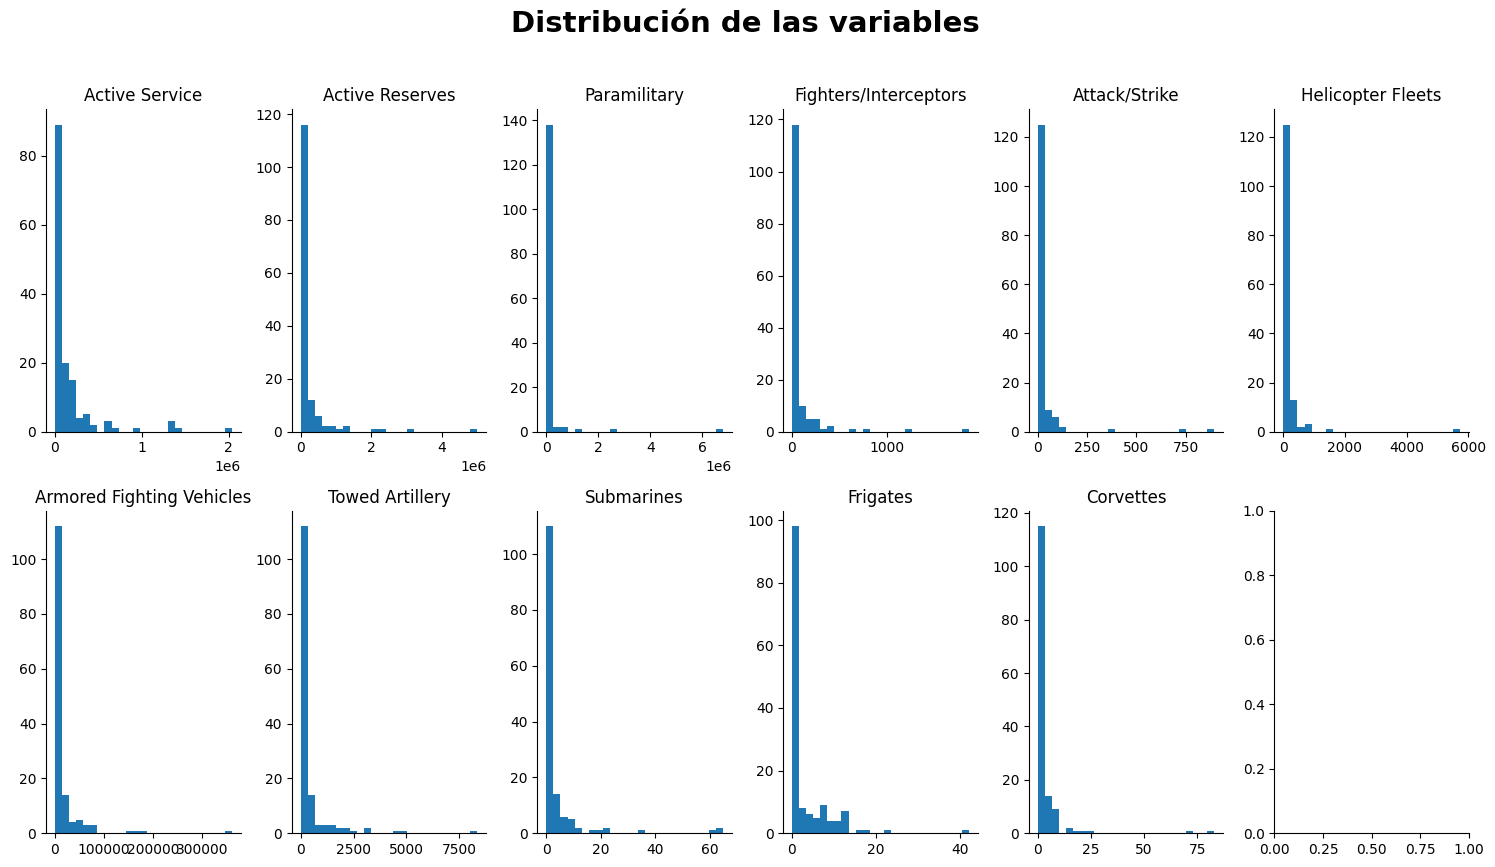

In [7]:
fig, axs = plt.subplots(2, 6, figsize=(15, 8))
axs = axs.flatten()

for i, col in enumerate(data.columns):
    ax = axs[i]
    ax.hist(data[col], bins=25)
    ax.set_title(col)

fig.tight_layout()
fig.text(0.5, 1.05, 'Distribución de las variables', weight='bold', ha='center', size=21)

Todas parecen estar sesgadas a la derecha i.e. las observaciones se concentran en la parte izquierda de las distribuciones.

#### ¿Hay algúna posible correlación?

<Axes: title={'center': 'Correlación líneal de las variables'}>

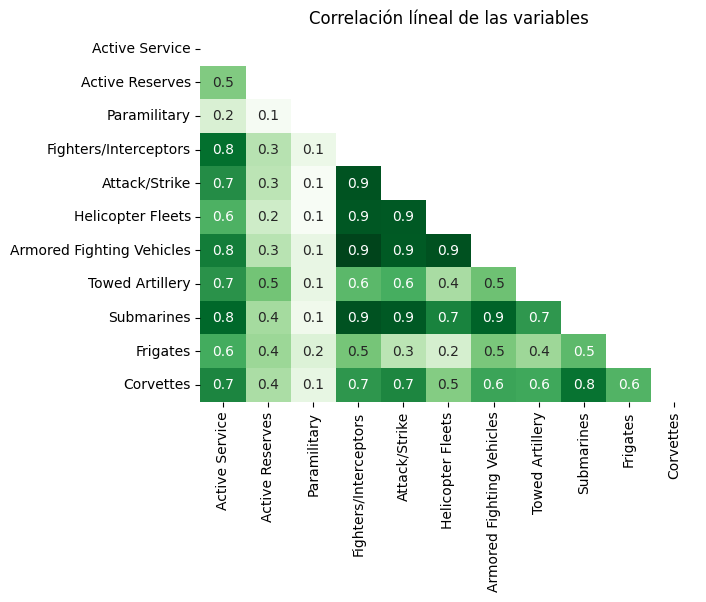

In [8]:
fig, ax = plt.subplots()

ax.set_title('Correlación líneal de las variables')
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool)) # Genera una mascara para quedarte con el triangulo inferior de la matriz
sns.heatmap(corr, mask=mask, ax=ax, annot=True, fmt='.1f', cmap='Greens', cbar=False)

- Se observa una alta correlación entre los `Active Service` y casi todas las variables, a excepción de `Paramilitary`. Esto sugiere que a mayor personal militar activo hay más equipo naval, aéreo y terrestre.
- De igual forma, se observa una alta correlación entre `Fighters/Interceptors` y el número de aeronaves `Attack/Strike`, `Helicopter Fleets`, `Armored Fighting Vehicles` y `Submarines`

#### ¿Es posible reducir la dimensionalidad?

Es posible, pero ¿nos dice algo?

In [9]:
# Intenta con 10 componentes principales y observa que tanta varianza explica
pca = PCA(n_components=10)
pca.fit(data)
display(list(map(lambda x: round(x, 4), pca.explained_variance_ratio_)))

# Interesante que con solo 2 componentes se explique gran parte de la varianza

[0.5025, 0.4181, 0.0786, 0.0008, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]

Transforma la información inicial con el `PCA` entrenado

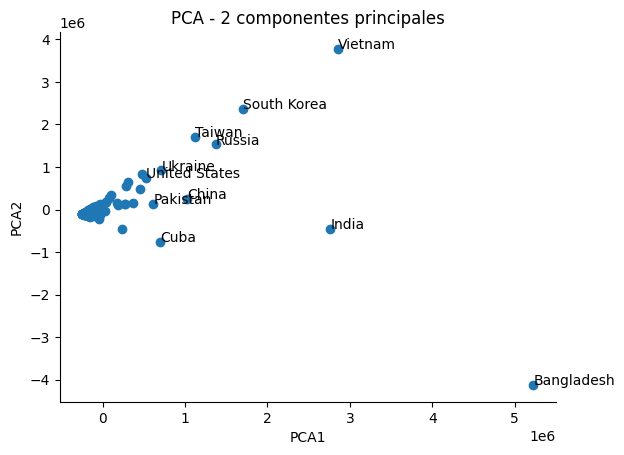

In [10]:
# Genera un dataframe y dale el formato necesario (nombre de columnas/indice)
data_pca = pd.DataFrame(pca.transform(data))
data_pca.columns = [f'PCA{i+1}' for i in data_pca.columns]
data_pca.index = data.index
data_pca = data_pca[['PCA1', 'PCA2']]

###############
# Grafica
###############
fig, ax = plt.subplots()
ax.scatter(data_pca['PCA1'], data_pca['PCA2'])

# Para aquellos paises que no estan concentrados, entonces graficalos
for index, row in data_pca.sort_values('PCA1', ascending=False).iloc[:11].iterrows():
    ax.text(row['PCA1'], row['PCA2'], index[0])

# Agrega aes
ax.set_title('PCA - 2 componentes principales')
ax.set_xlabel('PCA1')

_ = ax.set_ylabel('PCA2')

- Interesante que China, Rusia y EE.UU. esten cercanos, siendo estos países que se destacan por su poder militar. De igual forma, estan cerca de **Pakistán**, **Corea del Sur** y curiosamente **India**. Es probable que esta última se destaque por el número de población que se puede ver reflejado en población en servicio o reservas.
- Estos paises también se ven reflejados en el [2024 Military Strength Ranking](https://www.globalfirepower.com/countries-listing.php)

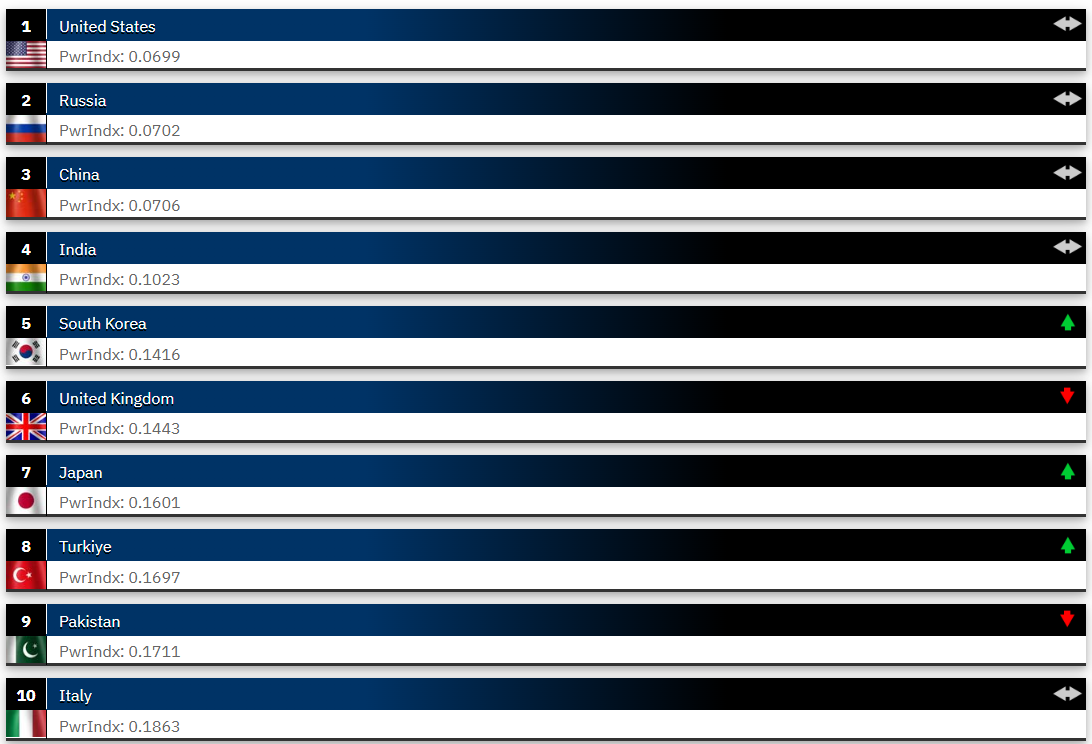

#### ¿Es posible hacer una agrupación con la información original?

¿Nos dice algo?

#### Seleccionando el número de Clusters

Para poder seleccionar el número de clusters "óptimo" se utilizará el método del codo, dónde se gráfica el `WCSS` contra el número de clusters para identificar el punto en el que el `WCSS` deja de decrecer de forma acelerada.

Según Gilabert, O. (2024) "el `WCSS` es básicamente una medida o métrica que nos aydua a entender cuán similares son los datos dentro de un mismo cluster". La fórmula para calcular el `WCSS` es la siguiente:

<img src="https://miro.medium.com/v2/resize:fit:574/format:webp/1*8wSEdBO1BIzHV3XhqpfV6Q.png" alt="formula_WCSS">

Donde:
- $k$ es el número de clusters
- $S_i$ representa el conjunto de puntos en el cluster $i$
- $x$ es n punto dentro del cluster $S_i$
- $u_i$ es el centroide del cluster $i$, es decir, el punto que repesenta el centro del cluster
- $||x - u_i||^2$ es la distancia al cuadrado entre el punto $x$ y el centroide $u_i$, lo que nos da una idea de "que tan lejos" esta cada punto de su centro.

En resumen, el `WCSS` es una métrica que nos ayuda de manera a reducir el "error" o la gran varianza entre los datos agrupados a un cluster y el centroide de este último.

#### Calculando el `CWSS` a mano

In [11]:
# Genera un K-means basico para poder emplear la formula a mano,
# mas alla de solo utilizar kmeans.inertia_
kmeans = KMeans(n_clusters=2, max_iter=10, random_state=11)
kmeans.fit(data)

# Genera una data para comprobar que nuestros resultados sean similares a los
# que calcula scikitlearn
clusters = kmeans.predict(data.copy())
data_comprueba = data.copy()
data_comprueba['cluster'] = clusters

# Obten los centroides de cada uno de los clusters entrenados y pegaselos a la data de comprobacion
clusters_centroids = pd.DataFrame(kmeans.cluster_centers_).reset_index()
clusters_centroids.columns = ['cluster'] + [f'media_{c}' for c in clusters_centroids.columns[1:]]
data_comprueba = pd.merge(data_comprueba, clusters_centroids, on='cluster', how='inner')

display('* Unique clusters', data_comprueba.groupby('cluster')['cluster'].count())

data_comprueba.head()

'* Unique clusters'

cluster
0    144
1      1
Name: cluster, dtype: int64

,Active Service,Active Reserves,Paramilitary,Fighters/Interceptors,Attack/Strike,Helicopter Fleets,Armored Fighting Vehicles,Towed Artillery,Submarines,Frigates,...,media_1,media_2,media_3,media_4,media_5,media_6,media_7,media_8,media_9,media_10
0,0,0,80000,0,0,11,6555,0,0,0,...,203210.659722,74927.222222,73.875,27.423611,144.833333,16562.118056,407.236111,3.305556,2.791667,2.930556
1,6600,2000,500,0,0,19,976,0,0,0,...,203210.659722,74927.222222,73.875,27.423611,144.833333,16562.118056,407.236111,3.305556,2.791667,2.930556
2,325000,135000,150000,102,42,298,35990,483,6,8,...,203210.659722,74927.222222,73.875,27.423611,144.833333,16562.118056,407.236111,3.305556,2.791667,2.930556
3,107000,0,10000,57,26,116,5500,552,0,0,...,203210.659722,74927.222222,73.875,27.423611,144.833333,16562.118056,407.236111,3.305556,2.791667,2.930556
4,108000,0,20000,24,10,90,21724,172,2,0,...,203210.659722,74927.222222,73.875,27.423611,144.833333,16562.118056,407.236111,3.305556,2.791667,2.930556


In [12]:
# Primero calcula la distancia entre la observacion y el centroide
WCSS = []
for k in data_comprueba['cluster'].unique():
    k_data = data_comprueba.query('cluster == @k')

    for i, row in k_data.iterrows():
        x = row.values[:11] # Vector de la observacion
        u_i = row.values[-11:] # Centroide del cluster
        distance = np.linalg.norm(x - u_i) ** 2 # Distance al cuadrado

        #################################
        # BONUS:
        # La euclidean distance de la diferencia de 2 vectors es igual a:
        # La raiz de La suma de la diferencia de los vectores al cuadrado (SS),
        # Muy similar al RMSE pero no exactamente
        # np.linalg.norm(x - u_i) == np.sqrt(((x - u_i) ** 2).sum())
        #################################

        WCSS.append(distance)
        
np.sum(WCSS) == kmeans.inertia_

True

#### Calcula el `k` clusters óptimo

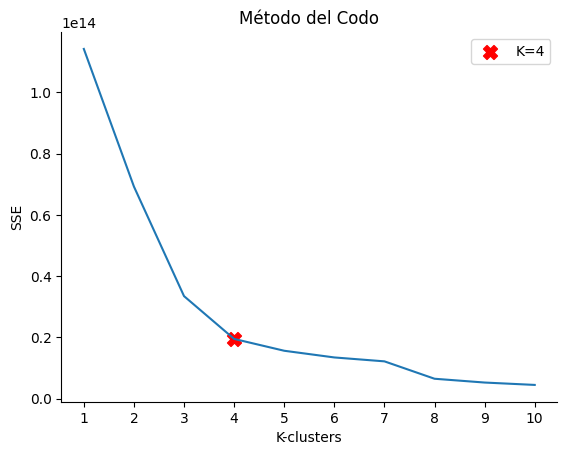

In [15]:
# Obten el WCSS de cada uno de los k clusters
WCSS = []

for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, max_iter=10000, random_state=11)
    kmeans.fit(data)
    WCSS.append(kmeans.inertia_)


# Grafica el codo
fig, ax = plt.subplots()
_ = np.arange(1, len(WCSS)+1)
ax.plot(_, WCSS)
ax.scatter(4, WCSS[3], color='red', marker='X', s=100, label='K=4')
plt.legend()

ax.set_xticks(_)
ax.set_xlabel('K-clusters')
ax.set_ylabel('SSE')
_ = ax.set_title('Método del Codo')

El codo se ve entre 3 y 4, vamos a dejarlo en el 4 de forma semi-arbitraria. Entonces entrena con el número de clusters óptimo.

In [16]:
# Entrena el algoritmo y predice
kmeans = KMeans(n_clusters=4, random_state=11)
kmeans.fit(data)

data_cluster = data.copy()
data_cluster['cluster'] = kmeans.predict(data_cluster)
data_cluster = data_cluster.reset_index()

# Cual es el numero de paises que se agruparon?
data_cluster.groupby('cluster')['country_shortName'].nunique()

cluster
0    134
1      1
2      3
3      7
Name: country_shortName, dtype: int64

In [17]:
for cluster, cluster_df in data_cluster.groupby('cluster'):
    print(f'> cluster={cluster}')
    display(cluster_df[['country_longName', 'country_shortName']].head(10))
    print()

> cluster=0


,country_longName,country_shortName
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,ALG
3,Angola,ANG
4,Argentina,ARG
5,Armenia,ARM
6,Australia,AUS
7,Austria,AST
8,Azerbaijan,AZR
9,Bahrain,BAH



> cluster=1


,country_longName,country_shortName
10,Bangladesh,BNG



> cluster=2


,country_longName,country_shortName
117,South Korea,SKO
126,Taiwan,TWN
141,Vietnam,VET



> cluster=3


,country_longName,country_shortName
28,China,CHN
53,India,IND
93,North Korea,NKO
97,Pakistan,PAK
107,Russia,RUS
134,Ukraine,UKR
137,United States,USA


¿Realmente nos sirve que tengamos 134 países en un mismo cluster, y tener solo 11 repartidos en 3 diferentes? No creo que sea la mejor forma de agrupar.

¿Cuáles son los centroides del `K-means`?

- Aquí se observa como los centroides de cada uno de los clusters usando `kmeans.cluster_centers_`, es lo mismo que agrupar por `cluster` y obtener el promedio.
- Un centroide no es más que el promedio de cada una de las variables, de todos los elementos que se encuentran dentro de un mismo cluster.

In [28]:
kmeans_centroids = pd.DataFrame(kmeans.cluster_centers_, columns=data.columns)

display(
    kmeans_centroids
    .style
    .background_gradient(cmap='Greens', subset=['Active Service'])
    .background_gradient(cmap='Greens', subset=['Active Reserves'])
    .background_gradient(cmap='Greens', subset=['Paramilitary'])
    .background_gradient(cmap='Greens', subset=['Fighters/Interceptors'])
    .background_gradient(cmap='Greens', subset=['Attack/Strike'])
    .background_gradient(cmap='Greens', subset=['Helicopter Fleets'])
    .background_gradient(cmap='Greens', subset=['Armored Fighting Vehicles'])
    .background_gradient(cmap='Greens', subset=['Towed Artillery'])
    .background_gradient(cmap='Greens', subset=['Submarines'])
    .background_gradient(cmap='Greens', subset=['Frigates'])
    .background_gradient(cmap='Greens', subset=['Corvettes'])
    .format('{:,.0f}')
)

display(
    data_cluster[data_cluster.columns[2:]].groupby('cluster').mean()
     .style
    .background_gradient(cmap='Blues', subset=['Active Service'])
    .background_gradient(cmap='Blues', subset=['Active Reserves'])
    .background_gradient(cmap='Blues', subset=['Paramilitary'])
    .background_gradient(cmap='Blues', subset=['Fighters/Interceptors'])
    .background_gradient(cmap='Blues', subset=['Attack/Strike'])
    .background_gradient(cmap='Blues', subset=['Helicopter Fleets'])
    .background_gradient(cmap='Blues', subset=['Armored Fighting Vehicles'])
    .background_gradient(cmap='Blues', subset=['Towed Artillery'])
    .background_gradient(cmap='Blues', subset=['Submarines'])
    .background_gradient(cmap='Blues', subset=['Frigates'])
    .background_gradient(cmap='Blues', subset=['Corvettes'])
    .format('{:,.0f}')
)

,Active Service,Active Reserves,Paramilitary,Fighters/Interceptors,Attack/Strike,Helicopter Fleets,Armored Fighting Vehicles,Towed Artillery,Submarines,Frigates,Corvettes
0,"87,483","90,133","46,735",34,11,75,"9,968",216,1,2,1
1,"163,000",0,"6,800,000",44,0,73,"13,100",437,2,7,6
2,"471,667","3,470,000","141,667",227,44,364,"34,979","2,228",11,16,7
3,"1,287,507","967,786","586,000",768,340,"1,393","134,904","3,293",36,11,30


,Active Service,Active Reserves,Paramilitary,Fighters/Interceptors,Attack/Strike,Helicopter Fleets,Armored Fighting Vehicles,Towed Artillery,Submarines,Frigates,Corvettes
cluster,,,,,,,,,,,
0,"87,483","90,133","46,735",34,11,75,"9,968",216,1,2,1
1,"163,000",0,"6,800,000",44,0,73,"13,100",437,2,7,6
2,"471,667","3,470,000","141,667",227,44,364,"34,979","2,228",11,16,7
3,"1,287,507","967,786","586,000",768,340,"1,393","134,904","3,293",36,11,30


#### Visualiza los clusters

Utiliza la información de [Country Polygons as GeoJSON](https://datahub.io/core/geo-countries#countries)

```bash
# Descarga la informacion
curl 'https://r2.datahub.io/clvyjaryy0000la0cxieg4o8o/main/raw/data/countries.geojson' -o countries.geojson
```

In [175]:
# Define una tabla con el resumen de los clusters, paises, que color, descripcion
clusters_summary = (pd.DataFrame(data_cluster.groupby('cluster')['country_shortName'].count())
                    .reset_index()
                    .rename(columns={'country_shortName': 'paises'})
                   )
clusters_summary['color'] = ['gray', 'red', 'green', 'blue']
clusters_summary['desc'] = [
    'Poder militar regular',
    'Poder militar especializado en paramilitar',
    'Poder militar medio',
    'Poder militar alto'
]
clusters_summary

,cluster,paises,color,desc
0,0,134,gray,Poder militar regular
1,1,1,red,Poder militar especializado en paramilitar
2,2,3,green,Poder militar medio
3,3,7,blue,Poder militar alto


In [135]:
# Importa el geo dataframe
countries = gpd.read_file('countries.geojson')

# Genera un diccionario para que ADMIN tenga los mismos valores que
# data_cluster.country_longName y puedan hacer match

countries_replace = {
    'Belize': 'Beliz',
    'Macao S.A.R': 'North Macedonia',
    'Republic of Serbia': 'Serbia',
    'United States of America': 'United States',
    'Republic of Congo': 'Republic of the Congo',
    'Turkey': 'Turkiye',
    'United Republic of Tanzania': 'Tanzania',
    'Czech Republic': 'Czechia'
}

countries['ADMIN'] = countries['ADMIN'].replace(countries_replace)
countries.head()

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.0498 38.40866, 71.05714 38...."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.5789, 19.74601 42...."


In [200]:
# Une la informacion geografica con la del cluster para poder visualizar los clusters
countries_clusters = (pd.merge(data_cluster[['country_longName', 'country_shortName', 'cluster']],
                              countries,
                              left_on='country_longName', right_on='ADMIN',
                              how='left')
                      .merge(clusters_summary,
                            on='cluster',
                            how='left'
                           )
                      .set_geometry('geometry')
                     )


countries_clusters.info()
countries_clusters.head()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   country_longName   145 non-null    object  
 1   country_shortName  145 non-null    object  
 2   cluster            145 non-null    int32   
 3   ADMIN              145 non-null    object  
 4   ISO_A3             145 non-null    object  
 5   ISO_A2             145 non-null    object  
 6   geometry           145 non-null    geometry
 7   paises             145 non-null    int64   
 8   color              145 non-null    object  
 9   desc               145 non-null    object  
dtypes: geometry(1), int32(1), int64(1), object(7)
memory usage: 10.9+ KB


,country_longName,country_shortName,cluster,ADMIN,ISO_A3,ISO_A2,geometry,paises,color,desc
0,Afghanistan,AFG,0,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.0498 38.40866, 71.05714 38....",134,gray,Poder militar regular
1,Albania,ALB,0,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.5789, 19.74601 42....",134,gray,Poder militar regular
2,Algeria,ALG,0,Algeria,DZA,DZ,"MULTIPOLYGON (((8.60251 36.93951, 8.60566 36.9...",134,gray,Poder militar regular
3,Angola,ANG,0,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",134,gray,Poder militar regular
4,Argentina,ARG,0,Argentina,ARG,AR,"MULTIPOLYGON (((-68.65412 -54.88624, -68.65414...",134,gray,Poder militar regular


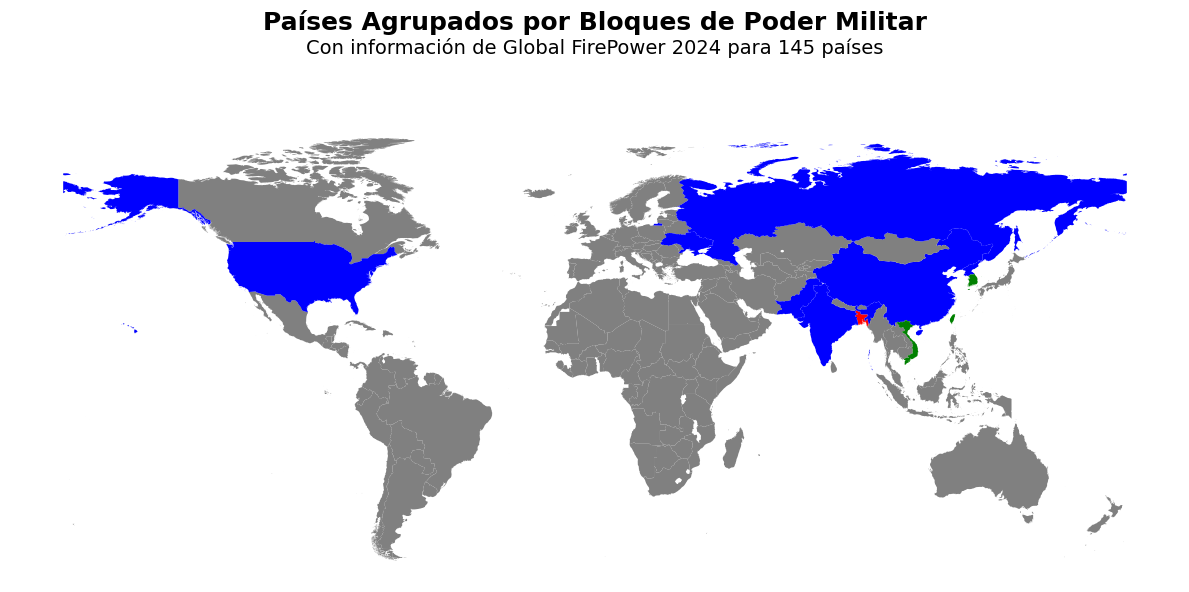

In [208]:
# Genera un canvas para graficar
fig, ax = plt.subplots(figsize=(12, 8))
countries_clusters.plot(color=countries_clusters['color'], ax=ax)

# Add aesthetics
ax.set_xticks([])
ax.set_yticks([])

fig.text(0.5, 0.9, 'Países Agrupados por Bloques de Poder Militar', ha='center', weight='bold', size=18)
fig.text(0.5, 0.87, f'Con información de Global FirePower 2024 para {clusters_summary.paises.sum()} países', ha='center', size=14)

for spine in ['left', 'bottom']:
    ax.spines[spine].set_visible(False)

plt.tight_layout()

<div class="alert alert-danger">
    TODO: Agrega leyendas custom para describir los clusters
</div>

## Con datos escalados

Cuáles son los países que más se parecen a:
- Japón
- Estados Unidos
- Rusia
- China
- México

## Takeways

- El centroide es el promedio de las variables de todas las observaciones/puntos dentro de un mismo cluster.
  - `pd.DataFrame.groupby('cluster').mean() -> centroides`
- El método del codo utiliza la diferencia euclediana de los valores de la observación vs. los valores promedio del centroide del cluster al que pertenece.
  - `np.linalg.norm(x - u_i) == np.sqrt(((x - u_i) ** 2).sum()): True`

## Referencias

- Gilabert, O. (2024). Entendiendo el Within Cluster Sum of Squares (WCSS). Medium. Recuperado de: https://medium.com/@oriolgilabertlopez/entendiendo-el-within-cluster-sum-of-squares-wcss-14935cb64672